# <font color='burgundy'> <u> Sentimental analysis on tweets: Reaction des francais municipales 2020 ?  </u></font>
## **By Pamela Dekas**


 
**BUT DU PROJET**: 
connaitre l’opinion des français sur les élections municipales de Paris 2020. ceci est un cas d’opinion mining sur une base de tweets recoltés via api

Le cleaning des données s'est fait exclusivement sur python, il nest pas parfait mais fonctionnel

#MunicipalesParis2020


In [16]:
#Nous commencons par importer les librairies nécessaires pour le notebook.
import sys
import csv
import tweepy
import re 
import nltk
import string
import unicodedata
from textblob import TextBlob
from collections import Counter
import pandas as pd
import numpy as np
from nltk.classify import * 
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk.classify.util
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

In [17]:
import csv
import tweepy 
import pandas as pd 
from textblob import TextBlob
import re 
import matplotlib.pyplot as plt

# clés d'authentification fournies par le compte développeur api de twitter
consumer_key = '4JQRjUXKxHWxKYF1XczgL7u4L'
consumer_secret = 'fs0YVnjaKZVWPmYqDqpSKkbSSgFb8Qx62wclbBJTERtIcumQC1'
access_token = '1186207076-QHTRp563cNOKFpZ3X10gguVzS0e6d3MpQPRdH04'
access_token_secret = 'CtTDsbNMs6qSMovjNn0AnzjTRTQQmAZsUCarVEPWTvLvx'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
    
# définir le formatage des hashtags et des tweets à l'aide de l'encodage utf-8
csvFile = open('Ml.csv', 'a')
csvWriter = csv.writer(csvFile)
writer = csv.writer(csvFile, delimiter=',')
csvWriter.writerow(['timestamp','tweet_text'])

for tweet in tweepy.Cursor(api.search,q="#MunicipalesParis2020", 
                           lang="fr",tweet_mode= "extended",since="2020-02-29").items(200):
       print(tweet.created_at, tweet.full_text)
csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf-8')])
    

2020-03-08 21:42:40 Retour sous nos fenêtres dans pas longtemps....sauf si on vote bien! #MunicipalesParis2020 https://t.co/3OT2ahFQlc
2020-03-08 21:41:58 RT @YvesPDB: La bourgeoisie #Buzyn #Pécresse) issue de l’#ENA des grandes écoles et du réseau des laboratoires a retrouvé un role par l’arr…
2020-03-08 21:41:45 RT @EnsembleEMacron: [#MunicipalesParis2020 🇨🇵] "Il suffit de marcher dans Paris pour voir que c’est un désastre. Dès les 100 premiers jour…
2020-03-08 21:39:34 RT @sophieaubepine: #MunicipalesParis2020 #Municipales2020 
Votez pour vous! Avec @Parisien_nes11 er @Parisien_nesNew
2020-03-08 21:37:50 RT @E_STIBBE: Engagées pour changer Paris!! avec ⁦@JBO_olivier⁩ et ⁦@datirachida⁩ ⁦@LesCentristes_⁩ ⁦@13acoeur⁩ #Paris13 #MunicipalesParis2…
2020-03-08 21:37:38 RT @EnsembleEMacron: [#MunicipalesParis2020 🇨🇵] "Il suffit de marcher dans Paris pour voir que c’est un désastre. Dès les 100 premiers jour…
2020-03-08 21:37:30 RT @sophieaubepine: #MunicipalesParis2020 #Municipales2020 
Vot

226

In [3]:
tweets = pd.read_csv('tweetsfinal.csv')

In [4]:
df = pd.DataFrame(tweets)
#df= df.drop([0,1], axis = 0)
print (df.head(10))

               date                                         tweet_text
0  29/02/2020 13:53   @agnesbuzyn Vous avez fait deja combien de #V...
1  29/02/2020 13:52  #pariscitoyen #MunicipalesParis2020 retrouvez ...
2  29/02/2020 13:28  Des candidat.e.s #UrgenceEcologie #Paris mobil...
3  29/02/2020 13:28  ...et le prix de la plus belle affiche : @eelv...
4  29/02/2020 13:06  Un scandale ! Les parisiens #Pietons abandonne...
5  29/02/2020 12:10  Les ecologistes du 20eme etaient ce matin avec...
6  29/02/2020 11:36  Superbe accueil ce matin au marche #Poncelet a...
7  29/02/2020 11:29  Le #Paris de @Anne_Hidalgo et sa majorite actu...
8  29/02/2020 11:22  En route pr animer debat entre citoyens engage...
9  29/02/2020 11:16  Rachida Dati a des soutiens de poids de droite...


In [5]:
print("Dataset size:", len(df))

Dataset size: 29648


In [6]:
df['tweet_text']= df = df.drop('date', 1)
df.head(5)

,tweet_text
0,@agnesbuzyn Vous avez fait deja combien de #V...
1,#pariscitoyen #MunicipalesParis2020 retrouvez ...
2,Des candidat.e.s #UrgenceEcologie #Paris mobil...
3,...et le prix de la plus belle affiche : @eelv...
4,Un scandale ! Les parisiens #Pietons abandonne...


In [7]:
df['tweet_text'] =df['tweet_text'].apply(str.lower)
df.head(5)

,tweet_text
0,@agnesbuzyn vous avez fait deja combien de #v...
1,#pariscitoyen #municipalesparis2020 retrouvez ...
2,des candidat.e.s #urgenceecologie #paris mobil...
3,...et le prix de la plus belle affiche : @eelv...
4,un scandale ! les parisiens #pietons abandonne...


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Marie de La
[nltk_data]     Côdre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### <font color='blue'> Les entrées de chaîne sont difficiles à traiter car ce type de données est fondamentalement différent du langage informatique natif.
utilisation des librairies textblob et NLTK pour le traitement de ce type de data.</font>

#### PREPROCESSING 

ici, nettoyage de base du texte( les emojis, caractères spéciaux, les tags...)

In [9]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticones
         u"\U0001F300-\U0001F5FF"  # symboles & pictogrammes
         u"\U0001F680-\U0001F6FF"  # Symboles des transports et cartes
         u"\U0001F1E0-\U0001F1FF"  # Drapeaux (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [10]:
def remove_non_ASCII(text):
    return ''.join([i if ord(i)< 128 else '' for i in text])

In [11]:
df['tweet_text']= df['tweet_text'].apply(remove_non_ASCII)
# Montrer les tweets nettoyés
df.head(5)

,tweet_text
0,@agnesbuzyn vous avez fait deja combien de #v...
1,#pariscitoyen #municipalesparis2020 retrouvez ...
2,des candidat.e.s #urgenceecologie #paris mobil...
3,...et le prix de la plus belle affiche : @eelv...
4,un scandale ! les parisiens #pietons abandonne...


In [12]:
# Creation d'une fonction permettant de nettoyer les tweets
def Text_cleansing(text):
    text = re.sub('@[A-Za-z0–9]+', '', str(text))#Enlever les tags @
    text = re.sub('#', '', text) # Enlever les '#' hash tag
    text = re.sub('rt', '', text)
    text = re.sub('RT[\s]+', '', text) # Enelever RT
    text = re.sub('https?:\/\/\S+', '', text) # Enelever hyperlink
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[\xe2\x80\x99]+',' ', text) # remplace l'apostrophe 
    text = re.sub(r'[\xc3\xaa]+','e', text)#remplace   
    text = re.sub(r'[\xc3\xa0]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\x81]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\x8C]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x99\x8C]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x99\x8F]+',' ', text)
    text = re.sub(r'[\xE2\x9C\x8A]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x91\x8C]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x91\x8D]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x91\x8F]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x92\xAA]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x94\xA5]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\x82]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\x92]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xA0]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xA1]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xA4]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xA9]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xAA]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x91\x8E]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x92\x94]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x92\xA2]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xAC]+',' ', text)
    text = re.sub(r'[\xF0]+',' ', text)
    text = re.sub(r'[\xF0\x9F\x98\xB4]+',' ', text)
    text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
    text=re.sub(',',' ', text)
    text=re.sub('!',' ',text)
    text=re.sub(':',' ',text)
    text=re.sub("'","",text)
    text=re.sub('"','',text)
    text = emoji_pattern.sub(r'',text)
    text = word_tokenize(text)
    word_stopwords = set(stopwords.words('french') + list(punctuation) + ['AT_USER','URL'])
    
    return [word for word in text if word not in word_stopwords]
    return text
   
    





In [13]:
# Nettoyage des tweets
df['cleaned_tweets']= df['tweet_text'].apply(Text_cleansing)
# Montrer les tweets nettoyés
df.head(5)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Marie de La Côdre/nltk_data'
    - 'c:\\users\\marie de la côdre\\appdata\\local\\programs\\python\\python37\\nltk_data'
    - 'c:\\users\\marie de la côdre\\appdata\\local\\programs\\python\\python37\\share\\nltk_data'
    - 'c:\\users\\marie de la côdre\\appdata\\local\\programs\\python\\python37\\lib\\nltk_data'
    - 'C:\\Users\\Marie de La Côdre\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [14]:
def Tweet_polarity(filtered_tweet):
    return TextBlob(filtered_tweet).sentiment.polarity

def Tweet_subjectivity(filtered_tweet): 
    return TextBlob(filtered_tweet).sentiment.subjectivity



In [15]:
df['cleaned_tweets']= df['cleaned_tweets'].apply(str)
df.head(20)

KeyError: 'cleaned_tweets'

In [76]:
df['Subjectivity'] = df['cleaned_tweets'].apply(Tweet_subjectivity)
df['Polarity'] = df['cleaned_tweets'].apply(Tweet_polarity)
df.head(25)

,tweet_text,cleaned_tweets,Subjectivity,Polarity
0,@agnesbuzyn vous avez fait deja combien de #v...,"['fait', 'deja', 'combien', 'victimes', 'mos',...",0.0,0.0
1,#pariscitoyen #municipalesparis2020 retrouvez ...,"['pariscitoyen', 'municipalesparis2020', 'retr...",0.0,0.0
2,des candidat.e.s #urgenceecologie #paris mobil...,"['candidat.e.s', 'urgenceecologie', 'paris', '...",0.0,0.0
3,...et le prix de la plus belle affiche : @eelv...,"['...', 'prix', 'plus', 'belle', 'affiche', 'm...",0.0,0.0
4,un scandale ! les parisiens #pietons abandonne...,"['scandale', 'parisiens', 'pietons', 'abandonn...",0.0,0.0
5,les ecologistes du 20eme etaient ce matin avec...,"['ecologistes', '20eme', 'etaient', 'matin', '...",0.1,0.1
6,superbe accueil ce matin au marche #poncelet a...,"['superbe', 'accueil', 'matin', 'marche', 'pon...",0.0,0.0
7,le #paris de @anne_hidalgo et sa majorite actu...,"['paris', '_hidalgo', 'majorite', 'actuelle', ...",0.0,0.0
8,en route pr animer debat entre citoyens engage...,"['route', 'pr', 'animer', 'debat', 'entre', 'c...",0.0,0.0
9,rachida dati a des soutiens de poids de droite...,"['rachida', 'dati', 'a', 'soutiens', 'poids', ...",0.0,0.0


In [78]:
def result_analysis(text):

            analysis = TextBlob(text)
            # print(analysis.sentiment)  # print tweet's polarity
            #polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
             return 'neutral' 
            elif (analysis.sentiment.polarity) > 0 :
               return 'positive'
            elif (analysis.sentiment.polarity) < 0: 
               return  'negative'

In [80]:
df['Analysis'] = df['cleaned_tweets'].apply(result_analysis)
df.head(7)

,tweet_text,cleaned_tweets,Subjectivity,Polarity,Analysis
0,@agnesbuzyn vous avez fait deja combien de #v...,"['fait', 'deja', 'combien', 'victimes', 'mos',...",0.0,0.0,neutral
1,#pariscitoyen #municipalesparis2020 retrouvez ...,"['pariscitoyen', 'municipalesparis2020', 'retr...",0.0,0.0,neutral
2,des candidat.e.s #urgenceecologie #paris mobil...,"['candidat.e.s', 'urgenceecologie', 'paris', '...",0.0,0.0,neutral
3,...et le prix de la plus belle affiche : @eelv...,"['...', 'prix', 'plus', 'belle', 'affiche', 'm...",0.0,0.0,neutral
4,un scandale ! les parisiens #pietons abandonne...,"['scandale', 'parisiens', 'pietons', 'abandonn...",0.0,0.0,neutral
5,les ecologistes du 20eme etaient ce matin avec...,"['ecologistes', '20eme', 'etaient', 'matin', '...",0.1,0.1,positive
6,superbe accueil ce matin au marche #poncelet a...,"['superbe', 'accueil', 'matin', 'marche', 'pon...",0.0,0.0,neutral


In [172]:
#df.to_csv('labelisedTweets', encoding='utf-8', index=False)

**Data Visualization**

exploration rapide, premier checfk sur l'attribution des sentiments.

In [81]:
# vue sur les tweets les plus négatifs

print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Polarity'][i] < -0.3):
    print(str(j) + ') '+sortedDF['tweet_text'][i])
    print()
    j=j+1



Printing negative tweets:

1)  je comprends pas comment on peut avoir autant de medias differents et une information aussi merdique. impossible de... https://t.co/qiutjgibs2';

2)  @florentjrg entre autres #fail #lameduck #hidalgo =&gt; #municipalesparis2020 #municipalesparis #parisencommun... https://t.co/ksjn7ner4d'

3)  vers une vague verte aux #municipales2020 !#urgenceecologie #ecologieparis #municipalesparis2020  @ecoloparis2020 ... https://t.co/1zbapcbpfp';

4)  voila votre -savoir faire- en la matiere =&gt;  #pietons #fail #hidalgo #paris10 #paris12 #pariscentre #thetimeisup... https://t.co/xg320sfoff'

5)  \x96\x8b [signatures a venir] vague de signatures ! - lundi @villanicedric ! - mercredi @david_belliard @ecoloparis2020... https://t.co/fu1ftxi3tx';

6)  @lyeslouffok aussi vague et impuissante que les reponses de #versini a mes questions en conseil de #paris #municipalesparis2020';

7)  @anne_hidalgo une baisse 2x moins rapide que dans les 6 precedentes annees #fail #hidalg

In [84]:
# vue sur les tweets positifs

print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Polarity'][i] > 0.8):
    print(str(j) + ') '+sortedDF['tweet_text'][i])
    print()
    j=j+1


Printing positive tweets:

1)  @mrericmas @marclandes40 @villanicedric @agnesbuzyn excellent choix !!!!! et je pense que vous n "etes pas le seul !... https://t.co/cju7ndntwt'

2)  ce matin,un excellent accueil pour notre liste citoyenne et independante  @parisien_nes20 devant l ecole mouraud.... https://t.co/hulpp5y1xu'"

3)  l "ideal serait un duel #buzyn. #dati  hidalgo out. #municipalesparis2020'

4) b"est ce que \x8ela femme est l'avenir de l'homme ? #lr #municipalesparis2020 #presidentielles2022  #ggrmc https://t.co/vozr1ljczy"

5)  @mrericmas @marclandes40 @villanicedric @agnesbuzyn excellent choix !!!!! et je pense que vous n "etes pas le seul !... https://t.co/cju7ndntwt'

6)  ce matin,un excellent accueil pour notre liste citoyenne et independante  @parisien_nes20 devant l ecole mouraud.... https://t.co/hulpp5y1xu'"

7)  l "ideal serait un duel #buzyn. #dati  hidalgo out. #municipalesparis2020'

8) b"est ce que \x8ela femme est l'avenir de l'homme ? #lr #municipalesparis2020 

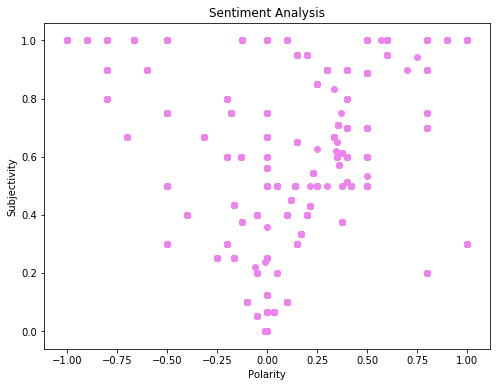

In [85]:
# Graphique
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='violet') 
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Le fait que peu de tweets arrivent finalement à être départagés entre positif et négatif n'est pas très surprenant car beaucoup de données ont étés éffacées en enlevant les émoticônes. De plus les utilisateurs utilisent beaucoup de sarcasmes dans leur tweets ce qui est très difficille au programme à comprendre.De plus, les tweets trop courts sont difficiles à classifier**

### Xhoix interval de confiance: selection tweets clairement labélisés : perte d'une partie du dataset/ a ce point, un dataset plus large et une labelisation des emoticones aurait du etre pris en compte...


In [88]:
# Compte le nombre de valeurs pour chaque label
df['Analysis'].value_counts()

neutral     27433
positive     1808
negative      407
Name: Analysis, dtype: int64

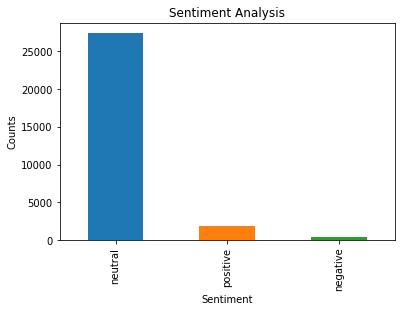

In [89]:
# Mettre en forme les données
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()  


In [100]:
#df.to_csv('label', encoding='utf-8', index=False)

In [151]:
from sklearn.model_selection import train_test_split
train, test = train_test_split( pd.read_csv('label.csv'), test_size=0.3)
train.sample(5)

,tweet_text,cleaned_tweets,Subjectivity,Polarity,Analysis,label
712,"b""tous acteurs pour prendre notre destin en ma...","[btous, acteurs, prendre, destin, main, linter...",0.611111,0.372222,positive,1
1283,rt @gilleslegendre: excellent choix de @agnes...,"[excellent, choix, candidate, municipales, a, ...",1.000000,1.000000,positive,1
154,la fabrique a recycler. #buzyn #hidalgo bonne...,"[fabrique, a, recycler, buzyn, hidalgo, bonnet...",0.950000,0.600000,positive,1
2021,"b""rt @paul_denton: c'est une super idee d'envo...","[b, _denton, cest, super, idee, denvoyer, buzy...",0.666667,0.333333,positive,1
2149,"b""rt @paul_denton: c'est une super idee d'envo...","[b, _denton, cest, super, idee, denvoyer, buzy...",0.666667,0.333333,positive,1


**DATA VISUALISATION**

Nous commencerons par utiliser WordCloud pour représenter l'utilisation des mots dans tous les tweets en redimensionnant chaque mot proportionnellement à sa fréquence. Ce graphique fournit une analyse textuelle et une idée générale du type de mots présents le plus fréquemment dans nos tweets.

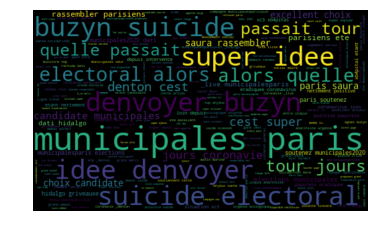

In [187]:
# nuage positif
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in train['cleaned_tweets'][train['Polarity'] > 0]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


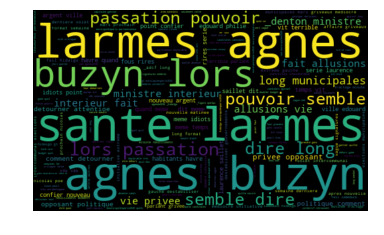

In [154]:
# nuage négatif
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in train['cleaned_tweets'][train['Polarity'] < 0]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Les wordcloud peuvent paraître compliqués à analyser. Car pour le positif, nous voyons apparaître le mot "suicide" qui est pourtant un terme très négatif. A savoir, que sur twitters ce sont les plus extremistes qui s'expriment la plus grande majorié du temps.
C'est le wordcloud négatif qui est beaucoup plus parlant :  des termes fort apparaissent en gros comme "suicide" "vie privée", "semble dire". 
Nous remarquons que dans les deux cas "Buzyn" apparaît, ce qui montre sa candidature susite un grand débat parmis les parisiens.**

**Préparation des données pour le modèle ML **



In [155]:
X_train, X_val, y_train, y_val = train_test_split(train['cleaned_tweets'], train['label'], random_state = 0)
X_train.shape, X_val.shape

((1162,), (388,))

In [156]:
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [157]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<1162x1620 sparse matrix of type '<class 'numpy.int64'>'
	with 12182 stored elements in Compressed Sparse Row format>

In [158]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_val)

In [159]:
#logistic regression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1 :', f1_score(y_val, pred))

F1 : 0.9873417721518987


In [160]:
#Naive bayes 
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1 :', f1_score(y_val, pred))

F1 : 0.9935897435897436


In [163]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer().fit(X_train)
print('Total Features =', len(vect.get_feature_names()))
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
pred = model.predict(vect.transform(X_val))
print('F1: ', f1_score(y_val, pred))

Total Features = 1620
F1:  0.9585253456221198


## Feedback

les tweets sont datés de fin février à début mars. la base est restreinte: politiques de twitter. 
quelques observations: 
- Pourquoi "Buzyn" apparaît autant: données collectées après l'affaire Grievaux 

En enlevant les tweets neutres qui sont à 85% de la totalité des tweets, les données restantes étaient très bien labellisés, ce qui explique un F1 score aussi élevé : 0.987.le set de test est très peu utile, car il est tout aussi bien labellisés.

Ce qui influence les resultats de cette analyse, c'est toute la partie de préprocessing, le nettoyage et le choix des librairies/lexiques et tokenisation. Le set de données était composé de tweets et retweets, donc beaucoup de mots dédoublés (tokens), ce qui explique aussi le fait que le F1 score soit aussi bon !

Pour améliorer ce modèle il aurait fallu partir sur un nombre encore plus important de tweets et surtout explorer les emoticones qui representent une enorme quantité d'information. l'utilisation ou la creation dune librairie d'emoticone serait une bonne piste pour leur exploitation. mais aussi la gestion des stopwords qui est restreinte avec nltk plus adapté à l'anglais. 




references: 

https://github.com/the-javapocalypse/Twitter-Sentiment-Analysis/blob/master/main.py
https://www.kaggle.com/mistryjimit26/twitter-sentiment-analysis-basic